In [1]:
import numpy as np
from keras import layers, models
from keras.datasets import imdb

# 詞彙量只取15000
MAX_WORDS = 15000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=MAX_WORDS)
print(train_data[0])
print(max([max(sequence) for sequence in train_data]))

# 讀入字典, 每個數字代表一個單字
word_index = imdb.get_word_index()
print(type(word_index))
# 顯示前10筆字典內容
print(list(word_index.items())[:10])
# 將數字轉為文字
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])
# 顯示前5筆影評
for i in range(5):
    # 前3個字為保留字
    decoded_review = ' '.join([reverse_word_index.get(i - 3, "?") for i in train_data[i]])
    print(decoded_review)

# 將原始資料轉換成25000*15000的矩陣
'''
        15000(字彙) 有出現就填一
     |----------------
     |1 0 0 1 0 0 0 1
影評  |0 0 0 1 0 1 0 0
25000|
     |
     |
'''
def vectorize_sequence(sequences, dimension=MAX_WORDS):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


# 將影評轉為矩陣
X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
# 印出第一筆資料
print(X_train[0])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# 建立訓練模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(MAX_WORDS,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 開始訓練
history = model.fit(X_train, y_train, epochs=30, batch_size=256,
                    validation_data=(X_test, y_test))


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
14999
<class 'dict'>
[('fawn', 34701), ('tsukino', 5

Epoch 1/30
98/98 [==============================] - 5s 47ms/step - loss: 0.3548 - accuracy: 0.8544 - val_loss: 0.3025 - val_accuracy: 0.8781
Epoch 2/30
98/98 [==============================] - 3s 34ms/step - loss: 0.2002 - accuracy: 0.9274 - val_loss: 0.2908 - val_accuracy: 0.8830
Epoch 3/30
98/98 [==============================] - 3s 35ms/step - loss: 0.1477 - accuracy: 0.9460 - val_loss: 0.3111 - val_accuracy: 0.8796
Epoch 4/30
98/98 [==============================] - 3s 35ms/step - loss: 0.1184 - accuracy: 0.9571 - val_loss: 0.3459 - val_accuracy: 0.8734
Epoch 5/30
98/98 [==============================] - 3s 35ms/step - loss: 0.0959 - accuracy: 0.9668 - val_loss: 0.3818 - val_accuracy: 0.8691
Epoch 6/30
98/98 [==============================] - 3s 34ms/step - loss: 0.0783 - accuracy: 0.9734 - val_loss: 0.4256 - val_accuracy: 0.8631
Epoch 7/30
98/98 [==============================] - 3s 34ms/step - loss: 0.0633 - accuracy: 0.9782 - val_loss: 0.4735 - val_accuracy: 0.8584
Epoch 8/30
98

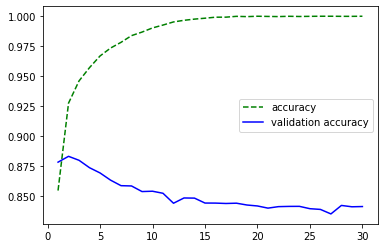

In [2]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, 'g--', label='accuracy')
plt.plot(epochs, val_accuracy, 'b-', label='validation accuracy')
plt.legend()

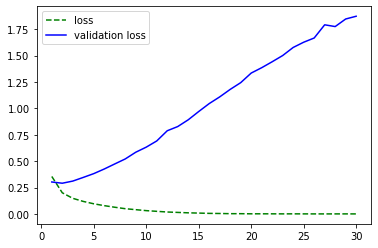

In [3]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(epochs, loss, 'g--', label='loss')
plt.plot(epochs, val_loss, 'b-', label='validation loss')
plt.legend()